# Video Game Sales
https://www.kaggle.com/gregorut/videogamesales

    Rank - Ranking of overall sales

    Name - The games name

    Platform - Platform of the games release (i.e. PC,PS4, etc.)

    Year - Year of the game's release

    Genre - Genre of the game

    Publisher - Publisher of the game

    NA_Sales - Sales in North America (in millions)

    EU_Sales - Sales in Europe (in millions)

    JP_Sales - Sales in Japan (in millions)

    Other_Sales - Sales in the rest of the world (in millions)

    Global_Sales - Total worldwide sales.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('vgsales.csv')
print(data[0:5][:])

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [14]:
print(data.isna().sum())
print('---------------------')
print(data.nunique())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
---------------------
Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64


In [19]:
data['Year'] = data['Year'].fillna(method='bfill')
print(data.shape)
data = data.dropna(axis=0)
print(data.shape)
print(data.isna().sum())

(16598, 11)
(16540, 11)
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


## EDA

In [35]:
data_platform = data.groupby(by='Platform').sum()
data_platform_drop = data_platform.drop(['Rank','Year'],axis=1)
data_platform_drop = data_platform_drop.sort_values(by='Global_Sales',ascending=False)
data_platform_drop
#data_platform_drop[:21]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,582.17,338.19,139.20,193.00,1252.43
X360,601.04,280.54,12.42,85.54,979.89
PS3,392.26,343.23,79.92,141.93,957.29
Wii,507.56,268.33,69.21,80.60,926.36
DS,390.67,194.63,175.34,60.53,822.19
PS,335.65,213.02,139.78,40.80,729.07
GBA,181.85,73.15,47.06,7.62,310.29
PSP,108.93,68.25,76.67,42.19,296.10
PS4,96.80,123.70,14.30,43.36,278.10


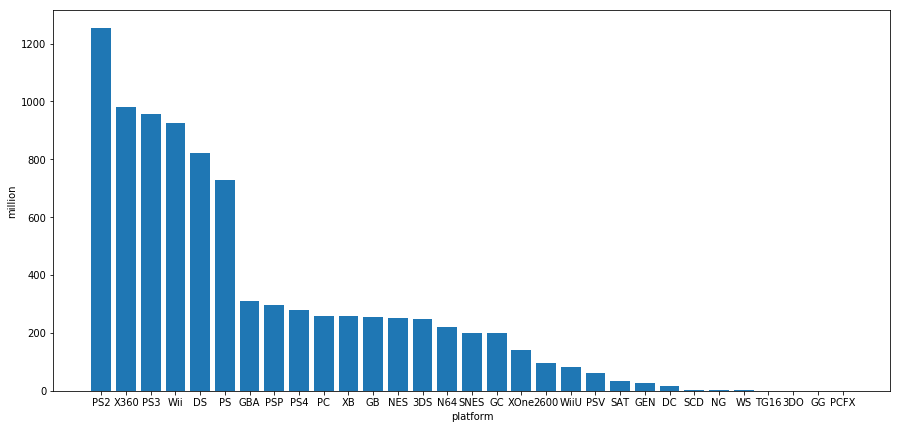

In [100]:
plt.figure(figsize=(15,7))
platform_population = np.arange(len(data_platform_drop.index))
plt.bar(x=platform_population,height=data_platform_drop['Global_Sales'])
plt.xticks(platform_population,data_platform_drop.index)
plt.xlabel('platform')
plt.ylabel('million')
plt.show()

In [70]:
data_year = data.groupby(by='Year').sum()
data_year = data_year.drop('Rank',axis =1)
data_year = data_year.drop(2020.0,axis =0)
#data_year = data_year.sort_values(by='Global_Sales',ascending=False)
data_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.84,0.69,0.00,0.12,11.65
1981.0,33.80,1.98,0.00,0.32,36.19
1982.0,27.65,1.77,0.00,0.33,29.72
1983.0,7.99,1.01,8.11,0.19,17.29
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,34.41,5.05,14.56,0.96,54.97
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


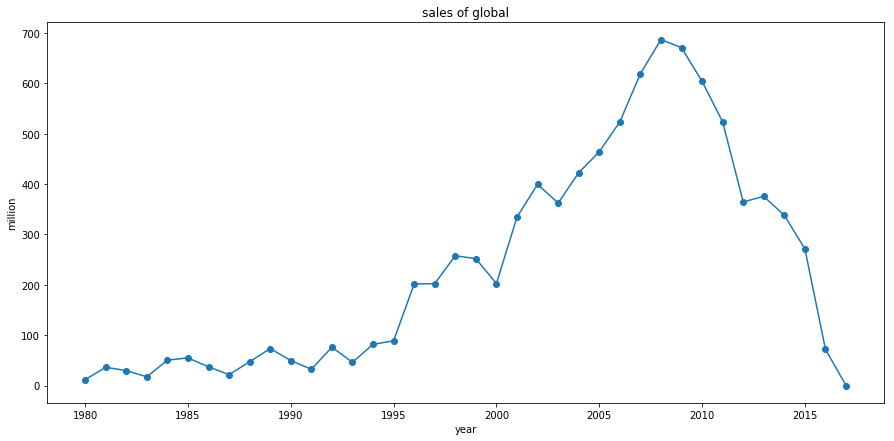

In [84]:
plt.figure(figsize=(15,7))
plt.plot(data_year['Global_Sales'],'o-')
plt.title('sales of global')
plt.xlabel('year')
plt.ylabel('million')
plt.show()